<a href="https://colab.research.google.com/github/ayush432003/image-generation-python/blob/main/Copy_of_neural_network_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Implementation of NAND Logic Gate
# importing Python library
import numpy as np

# define Unit Step Function
def unitStep(v):
    if v >= 0:
        return 1
    else:
        return 0

# design Perceptron Model
def perceptronModel(x, w, b):
    v = np.dot(w, x) + b
    y = unitStep(v)
    return y

# NOT Logic Function
# wNOT = -1, bNOT = 0.5
def NOT_logicFunction(x):
    wNOT = -1
    bNOT = 0.5
    return perceptronModel(x, wNOT, bNOT)

# AND Logic Function
# w1 = 1, w2 = 1, bAND = -1.5
def AND_logicFunction(x):
    w = np.array([1, 1])
    bAND = -1.5
    return perceptronModel(x, w, bAND)

# NAND Logic Function
# with AND and NOT
# function calls in sequence
def NAND_logicFunction(x):
    output_AND = AND_logicFunction(x)
    output_NOT = NOT_logicFunction(output_AND)
    return output_NOT

# testing the Perceptron Model
test1 = np.array([0, 1])
test2 = np.array([1, 1])
test3 = np.array([0, 0])
test4 = np.array([1, 0])

print("NAND({}, {}) = {}".format(0, 1, NAND_logicFunction(test1)))
print("NAND({}, {}) = {}".format(1, 1, NAND_logicFunction(test2)))
print("NAND({}, {}) = {}".format(0, 0, NAND_logicFunction(test3)))
print("NAND({}, {}) = {}".format(1, 0, NAND_logicFunction(test4)))

NAND(0, 1) = 1
NAND(1, 1) = 0
NAND(0, 0) = 1
NAND(1, 0) = 1


In [ ]:
#Implementation of NOR Logic Gate
# importing Python library
import numpy as np

# define Unit Step Function
def unitStep(v):
    if v >= 0:
        return 1
    else:
        return 0

# design Perceptron Model
def perceptronModel(x, w, b):
    v = np.dot(w, x) + b
    y = unitStep(v)
    return y

# NOT Logic Function
# wNOT = -1, bNOT = 0.5
def NOT_logicFunction(x):
    wNOT = -1
    bNOT = 0.5
    return perceptronModel(x, wNOT, bNOT)

# OR Logic Function
# w1 = 1, w2 = 1, bOR = -0.5
def OR_logicFunction(x):
    w = np.array([1, 1])
    bOR = -0.5
    return perceptronModel(x, w, bOR)

# NOR Logic Function
# with OR and NOT
# function calls in sequence
def NOR_logicFunction(x):
    output_OR = OR_logicFunction(x)
    output_NOT = NOT_logicFunction(output_OR)
    return output_NOT

# testing the Perceptron Model
test1 = np.array([0, 1])
test2 = np.array([1, 1])
test3 = np.array([0, 0])
test4 = np.array([1, 0])

print("NOR({}, {}) = {}".format(0, 1, NOR_logicFunction(test1)))
print("NOR({}, {}) = {}".format(1, 1, NOR_logicFunction(test2)))
print("NOR({}, {}) = {}".format(0, 0, NOR_logicFunction(test3)))
print("NOR({}, {}) = {}".format(1, 0, NOR_logicFunction(test4)))

NOR(0, 1) = 0
NOR(1, 1) = 0
NOR(0, 0) = 1
NOR(1, 0) = 0


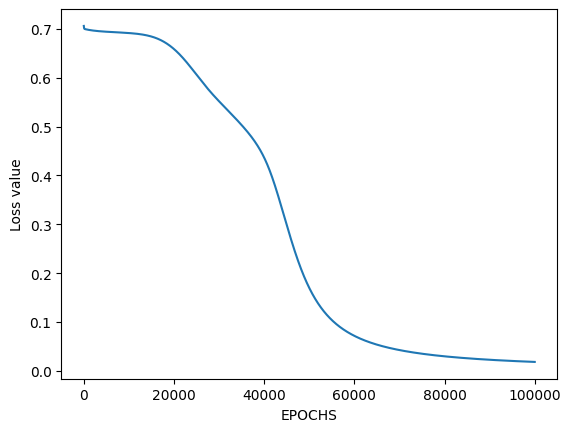

[[1. 0. 0. 1.]]


In [ ]:
##Implementation of XOR Logic Gate
#import Python Libraries
import numpy as np
from matplotlib import pyplot as plt

# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialization of the neural network parameters
# Initialized all the weights in the range of between 0 and 1
# Bias values are initialized to 0
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
    b1 = np.zeros((neuronsInHiddenLayers, 1))
    b2 = np.zeros((outputFeatures, 1))

    parameters = {"W1" : W1, "b1": b1,
                  "W2" : W2, "b2": b2}
    return parameters

# Forward Propagation
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2

# Backward Propagation
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m

    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

# Updating the weights based on the negative gradients
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters

# Model to learn the XOR truth table
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # XOR input
Y = np.array([[0, 1, 1, 0]]) # XOR output

# Define model parameters
neuronsInHiddenLayers = 2 # number of hidden layer neurons (2)
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))

for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)

# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

# Testing
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # XOR input
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
# print(A2)
print(prediction)

In [ ]:
#Implementation of XNOR Logic Gate
# importing Python library
import numpy as np

# define Unit Step Function
def unitStep(v):
    if v >= 0:
        return 1
    else:
        return 0

# design Perceptron Model
def perceptronModel(x, w, b):
    v = np.dot(w, x) + b
    y = unitStep(v)
    return y

# NOT Logic Function
# wNOT = -1, bNOT = 0.5
def NOT_logicFunction(x):
    wNOT = -1
    bNOT = 0.5
    return perceptronModel(x, wNOT, bNOT)

# AND Logic Function
# w1 = 1, w2 = 1, bAND = -1.5
def AND_logicFunction(x):
    w = np.array([1, 1])
    bAND = -1.5
    return perceptronModel(x, w, bAND)

# OR Logic Function
# here w1 = wOR1 = 1,
# w2 = wOR2 = 1, bOR = -0.5
def OR_logicFunction(x):
    w = np.array([1, 1])
    bOR = -0.5
    return perceptronModel(x, w, bOR)

# XNOR Logic Function
# with AND, OR and NOT
# function calls in sequence
def XNOR_logicFunction(x):
    y1 = OR_logicFunction(x)
    y2 = AND_logicFunction(x)
    y3 = NOT_logicFunction(y1)
    final_x = np.array([y2, y3])
    finalOutput = OR_logicFunction(final_x)
    return finalOutput

# testing the Perceptron Model
test1 = np.array([0, 1])
test2 = np.array([1, 1])
test3 = np.array([0, 0])
test4 = np.array([1, 0])

print("XNOR({}, {}) = {}".format(0, 1, XNOR_logicFunction(test1)))
print("XNOR({}, {}) = {}".format(1, 1, XNOR_logicFunction(test2)))
print("XNOR({}, {}) = {}".format(0, 0, XNOR_logicFunction(test3)))
print("XNOR({}, {}) = {}".format(1, 0, XNOR_logicFunction(test4)))

XNOR(0, 1) = 0
XNOR(1, 1) = 1
XNOR(0, 0) = 1
XNOR(1, 0) = 0
